## **Tarefa 1: MO433 - Aprendizado não supervisionado**

## **Equipe:**

* Elian Laura  | 265685
* Iury Cleveston  | 230216

In [6]:
!wget http://fimi.ua.ac.be/data/retail.dat 

--2021-10-19 09:36:22--  http://fimi.ua.ac.be/data/retail.dat
Resolvendo fimi.ua.ac.be (fimi.ua.ac.be)... 143.129.69.1
Conectando-se a fimi.ua.ac.be (fimi.ua.ac.be)|143.129.69.1|:80... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: http://fimi.uantwerpen.be/data/retail.dat [redirecionando]
--2021-10-19 09:36:29--  http://fimi.uantwerpen.be/data/retail.dat
Resolvendo fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Reaproveitando a conexão existente para fimi.ua.ac.be:80.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 4167490 (4,0M)
Salvando em: “retail.dat.1”

retail.dat.1          0%[                    ]  14,78K  --.-KB/s    TED 52m 12s^C


In [90]:
# Load the data
transactions = []

for line in open('retail.dat', 'r'):
    
    # Remove spaces
    items = line.strip()
    
    # Split and add the items to the transaction
    transactions.append(items.split(' '))

### 1) Algoritmo Apriori from apyori

In [91]:
!pip install apyori

Defaulting to user installation because normal site-packages is not writeable


In [92]:
from apyori import apriori
import matplotlib.pyplot as plt
import pandas as pd

In [94]:
# Create the apyory generator
results_generator = apriori(transactions, min_support=0.005, min_confidence=0.9)

# Show the rules with support, confidence and lift
rules_df = pd.DataFrame(columns=['rule', 'support', 'confidence', 'lift'])

supports = []
confidences = []
lifts = []

for i in results_generator: 
    
    items_base = list(i.ordered_statistics[0].items_base)
    items_add = list(i.ordered_statistics[0].items_add)
    
    # Collect metrics
    supports.append(i.support)
    confidences.append(i.ordered_statistics[0].confidence)
    lifts.append(i.ordered_statistics[0].lift)
    
    new_row = {'rule': ', '.join(items_base) + ' => ' + ','.join(items_add), 
               'support': round(i.support, 3),
               'confidence': round(i.ordered_statistics[0].confidence, 3),
               'lift': round(i.ordered_statistics[0].lift, 3)}
    
    rules_df = rules_df.append(new_row, ignore_index=True)

# Sort by lift
rules_df = rules_df.sort_values('lift', ascending=False)
    
print(rules_df.to_string(index=False))
    

              rule  support  confidence    lift
    16011 => 16010    0.007       0.973  65.190
 39, 48, 110 => 38    0.012       0.994   5.620
 39, 41, 110 => 38    0.006       0.992   5.609
     39, 110 => 38    0.020       0.989   5.592
 48, 170, 39 => 38    0.014       0.989   5.592
     371, 39 => 38    0.006       0.989   5.589
     48, 170 => 38    0.017       0.988   5.584
 39, 48, 286 => 38    0.005       0.987   5.580
     105, 39 => 38    0.005       0.987   5.578
     32, 110 => 38    0.005       0.987   5.577
     170, 41 => 38    0.009       0.986   5.576
     48, 110 => 38    0.015       0.986   5.575
      48, 37 => 38    0.006       0.986   5.573
 41, 170, 39 => 38    0.007       0.986   5.571
     32, 170 => 38    0.006       0.985   5.569
 48, 170, 41 => 38    0.005       0.984   5.561
     41, 110 => 38    0.008       0.984   5.561
     48, 286 => 38    0.007       0.983   5.557
         371 => 38    0.009       0.981   5.544
     170, 39 => 38    0.023       0.981 

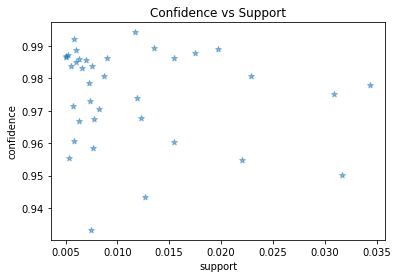

In [95]:
# Plots
plt.title("Confidence vs Support")
plt.scatter(supports, confidences, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

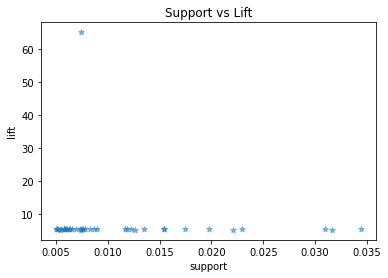

In [96]:
plt.title("Support vs Lift")
plt.scatter(supports, lifts, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('lift') 
plt.show()

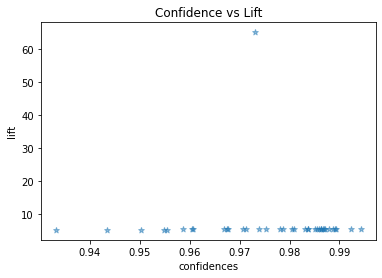

In [97]:
plt.title("Confidence vs Lift")
plt.scatter(confidences, lifts, alpha=0.5, marker="*")
plt.xlabel('confidences')
plt.ylabel('lift') 
plt.show()

### 2) Algoritmo Apriori from Efficient_Apriori

In [26]:
!pip install efficient_apriori

Defaulting to user installation because normal site-packages is not writeable


In [98]:
from efficient_apriori import apriori as efficient_apriori

# Initialize the apriori
itemsets, rules = efficient_apriori(transactions, min_support=0.005, min_confidence=0.9)

# Print rules
for rule in reversed(sorted(rules, key=lambda rule: rule.lift)):
  print(rule)

{16011} -> {16010} (conf: 0.973, supp: 0.007, lift: 65.190, conv: 36.612)
{110, 39, 48} -> {38} (conf: 0.994, supp: 0.012, lift: 5.620, conv: 142.259)
{110, 39, 41} -> {38} (conf: 0.992, supp: 0.006, lift: 5.609, conv: 105.974)
{170, 39, 48} -> {38} (conf: 0.989, supp: 0.014, lift: 5.592, conv: 76.358)
{110, 39} -> {38} (conf: 0.989, supp: 0.020, lift: 5.592, conv: 76.202)
{371, 39} -> {38} (conf: 0.989, supp: 0.006, lift: 5.589, conv: 72.981)
{170, 48} -> {38} (conf: 0.988, supp: 0.017, lift: 5.584, conv: 67.451)
{286, 39, 48} -> {38} (conf: 0.987, supp: 0.005, lift: 5.580, conv: 63.653)
{105, 39} -> {38} (conf: 0.987, supp: 0.005, lift: 5.578, conv: 62.418)
{110, 32} -> {38} (conf: 0.987, supp: 0.005, lift: 5.577, conv: 61.595)
{170, 41} -> {38} (conf: 0.986, supp: 0.009, lift: 5.576, conv: 60.236)
{110, 48} -> {38} (conf: 0.986, supp: 0.015, lift: 5.575, conv: 59.783)
{37, 48} -> {38} (conf: 0.986, supp: 0.006, lift: 5.573, conv: 58.131)
{170, 39, 41} -> {38} (conf: 0.986, supp: 0.0